mean:
BTC_VIA    0.000305
BTC_LTC    0.012593
dtype: float64
median:
BTC_VIA    0.000280
BTC_LTC    0.012384
dtype: float64
std:
BTC_VIA    0.000077
BTC_LTC    0.001603
dtype: float64


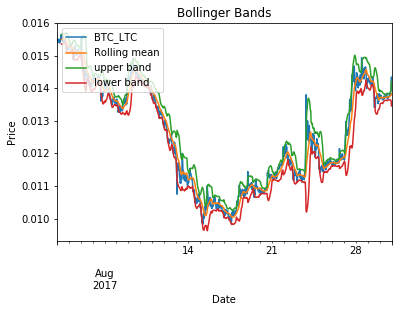

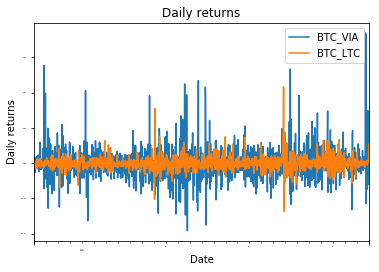

In [5]:
import pandas as pd
import logging
import datetime
import time

import matplotlib.pyplot as plt


def test_run(start_date, end_date):
    dates = pd.date_range(start_date, end_date, freq='30min')

    currencies = ['BTC_VIA', 'BTC_LTC']

    df = get_data(currencies, dates)

    # plot_data(df)

    # plot_selected(normalize_data(df), currencies, start_date, end_date)

    global_statistics(df)

    plot_bollinger_bands(df, 'BTC_LTC')

    daily_returns = compute_daily_return(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band


def global_statistics(df):
    print('mean:\n{}'.format(df.mean()))
    print('median:\n{}'.format(df.median()))
    print('std:\n{}'.format(df.std()))


def normalize_data(df):
    return df / df.ix[0,:]

def get_data(currencies, dates):
    df1 = pd.DataFrame(index=dates)
    for currency in currencies:
        df_currency = pd.read_csv('data/{}.csv'.format(currency), index_col="date", parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_currency = df_currency.rename(columns={'close': currency})
        df1 = df1.join(df_currency)
    return df1


def compute_daily_return(df):
    daily_returns = (df/ df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns


def plot_bollinger_bands(df, currency):
    values = df[currency]
    window = 20

    rm = values.rolling(window=window, center=False).mean()

    rstd = values.rolling(window=window, center=False).std()

    upper_band, lower_band = get_bollinger_bands(rm, rstd)

    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = values.plot(title="Bollinger Bands", label=currency)
    rm.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


def plot_data(df, title='prices', ylabel='Price'):
    ax = df.plot(title=title, fontsize=2)

    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    plt.show()

def get_formatted_date(my_date):
    return time.strftime('%Y-%m-%d', time.localtime(my_date))

def plot_selected(df, columns, start_date, end_date):
    plot_data(df.ix[start_date:end_date, columns], title='selected data')

if __name__ == '__main__':
    #end_date = datetime.datetime.now()
    #start_date = end_date + datetime.timedelta(days=-10)

    #test_run(get_formatted_date(start_date.timestamp()), get_formatted_date(end_date.timestamp()))

    test_run('2017-08-03', '2017-08-31')
